# ASSIGNMENT 3


# Imports


In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
# Insert the directory
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab/assignment3')

In [2]:
import torch
import torchvision
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots
import create_submission_zip.py

--------------------------------------------------------------------------------


AssertionError: ignored

# Functions

In [10]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=torchvision.models.resnet18(weights=ResNet18_Weights.DEFAULT)
    self.model.fc=nn.Linear(512,10)
    for param in self.model.parameters():
      param.requires_grad=False
    for param in self.model.fc.parameters():
      param.requires_grad=True
    for param in self.model.layer4.parameters():
      param.requires_grad=True
  def forward(self,x):
    x=self.model(x)
    return(x)

# Main

In [11]:
epochs = 10
batch_size = 32
learning_rate = 5e-4 # Should be 5e-5 for LeNet
early_stop_count = 10
dataloaders = load_cifar10(batch_size)
model = Model()
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()
trainer.test()

Files already downloaded and verified
Files already downloaded and verified
Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

# Print

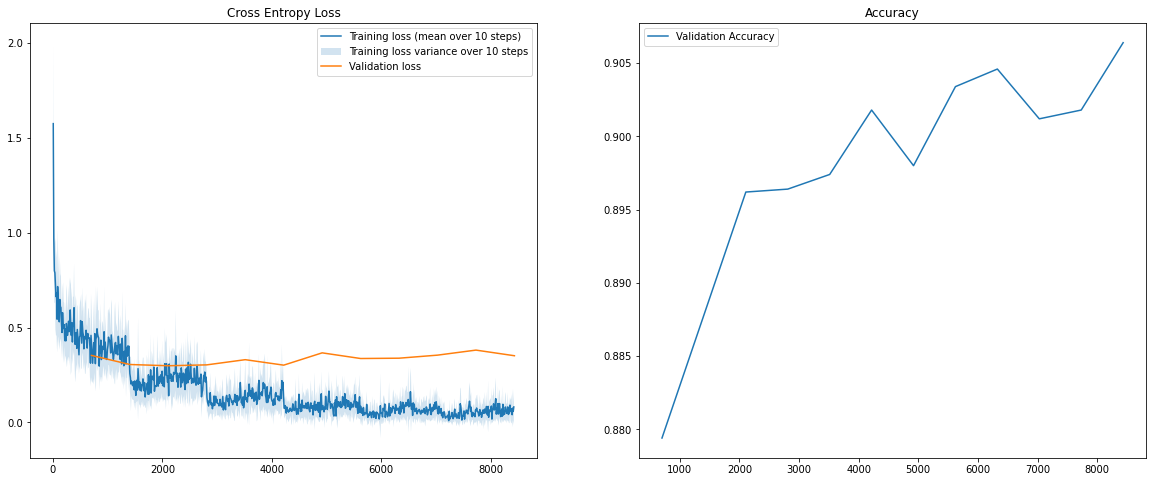

In [12]:
create_plots(trainer, "task4")

In [13]:
%run create_submission

ERROR:root:File `'create_submission_zip.py'` not found.
